In [48]:
pip install xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


In [115]:
#importing necessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report,root_mean_squared_error,mean_squared_error,mean_absolute_error,r2_score
)
from xgboost import XGBRegressor
import lightgbm as lgb
plt.style.use('ggplot')



In [50]:
#loading the dataset
csc_data = pd.read_csv('cscpopendata.csv')

In [51]:
#brief math of the data
csc_data.describe()

,CDPHId,CSFId,CompanyId,PrimaryCategoryId,SubCategoryId,CasId,ChemicalId,ChemicalCount
count,114635.000000,80662.000000,114635.000000,114635.000000,114635.000000,114635.000000,114635.000000,114635.000000
mean,20304.858987,32608.658377,450.641532,51.076294,66.819252,674.094107,32837.556959,1.288359
std,12489.052554,19089.443910,409.533093,20.474341,35.822097,149.214101,20439.412299,0.636418
min,2.000000,1.000000,4.000000,1.000000,3.000000,2.000000,0.000000,0.000000
25%,8717.000000,15789.000000,86.000000,44.000000,48.000000,656.000000,13990.000000,1.000000
50%,20895.000000,32541.000000,297.000000,44.000000,52.000000,656.000000,32055.000000,1.000000
75%,31338.500000,48717.750000,798.000000,59.000000,65.000000,656.000000,51578.500000,1.000000
max,41524.000000,65009.000000,1391.000000,111.000000,172.000000,1242.000000,68074.000000,9.000000


In [52]:
#basic info of the data
csc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [53]:
#Looking for the null values present in each column
csc_data.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34398
CompanyId                      0
CompanyName                    0
BrandName                    227
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [54]:
#finding out the number of unique values present in each row
csc_data.select_dtypes(include='int64').nunique()

CDPHId               36972
CompanyId              635
PrimaryCategoryId       13
SubCategoryId           92
CasId                  134
ChemicalId           58079
ChemicalCount           10
dtype: int64

In [55]:
csc_data.select_dtypes(include='object').nunique()

ProductName               33716
CSF                       34326
CompanyName                 606
BrandName                  2713
PrimaryCategory              13
SubCategory                  89
CasNumber                   125
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [56]:
csc_data['ChemicalName'].unique()

array(['Titanium dioxide', 'Distillates (coal tar)', 'Estragole',
       'Cocamide diethanolamine', 'Toluene',
       'Chromium (hexavalent compounds)', 'Retinol',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Vitamin A', 'Vitamin A palmitate', 'Butylated hydroxyanisole',
       'Coffea arabica extract', 'Lauramide diethanolamine', 'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Carbon black', 'Genistein (purified)', 'Progesterone',
       '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
       'Methyleugenol', 'Carbon-black extracts', 'Retinyl palmitate',
       'o-Phenylphenol', 'Acrylamide', 'Formaldehyde (gas)',
       'Ginkgo biloba extract', 'Mica', 'Ethylene glycol',
       'Acetic acid, retinyl ester', 'Ethyl acrylate', 'Trade Secret',
       'Methanol', 'Mineral oils, untreated 

In [57]:
#dropping the duplicates present in the data
csc_data.drop_duplicates()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


C:\Users\ar1963\AppData\Local\Temp\ipykernel_23432\1858846334.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(csc_data.ChemicalCount.dropna())


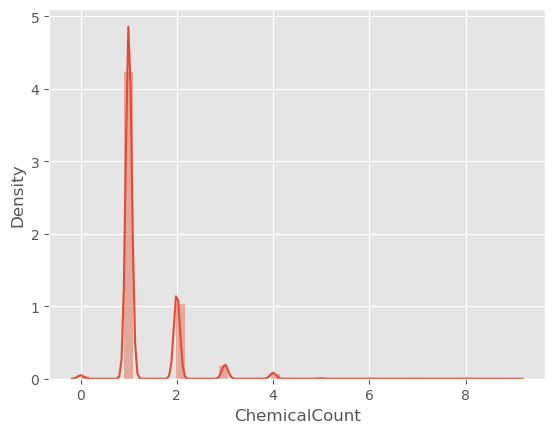

In [58]:
#graph to show the frequency of different values of chemical count
sns.distplot(csc_data.ChemicalCount.dropna())
plt.show()

In [59]:
csc_data.nunique()

CDPHId                    36972
ProductName               33716
CSFId                     58167
CSF                       34326
CompanyId                   635
CompanyName                 606
BrandName                  2713
PrimaryCategoryId            13
PrimaryCategory              13
SubCategoryId                92
SubCategory                  89
CasId                       134
CasNumber                   125
ChemicalId                58079
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
ChemicalCount                10
dtype: int64

In [60]:
#dividing cosmetics based on the number of chemicals used
below_five = csc_data[csc_data["ChemicalCount"]<5]
above_five = csc_data[csc_data["ChemicalCount"]>=5]
sorted_df = above_five.sort_values(by='ChemicalCount', ascending=False)

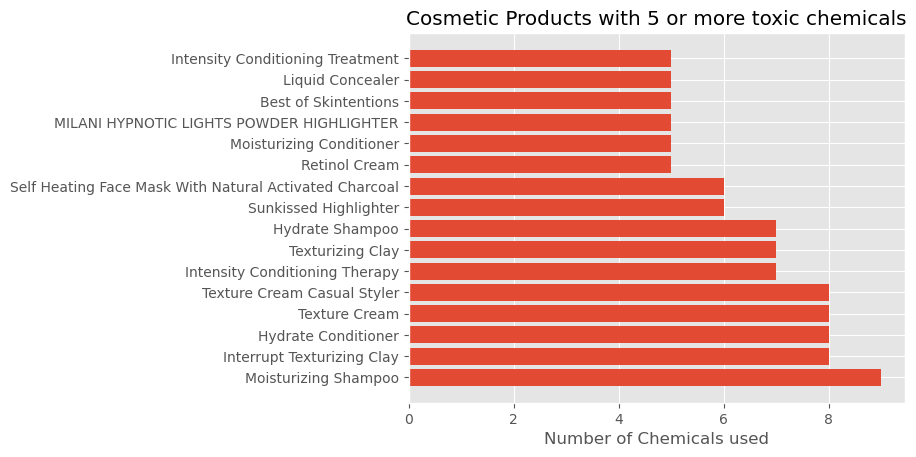

In [61]:
plt.barh(sorted_df['ProductName'],sorted_df['ChemicalCount'])
plt.xlabel("Number of Chemicals used")
plt.title("Cosmetic Products with 5 or more toxic chemicals")
plt.show()

In [62]:
#finding out the average chemicals used by a brand in their products
average_chemicals_per_brand = csc_data.groupby('BrandName')['ChemicalCount'].mean().reset_index()
average_chemicals_per_brand = average_chemicals_per_brand[average_chemicals_per_brand["ChemicalCount"]>=3]
average_chemicals_per_brand = average_chemicals_per_brand.sort_values(by='ChemicalCount', ascending=False)
average_chemicals_per_brand

,BrandName,ChemicalCount
1524,Mastercuts,6.363636
1916,Regis Design Line,5.867347
552,Careline,4.461538
772,Dermaquest Skin Therapy,4.000000
1743,PALLADIO,4.000000
2629,Zoeva,4.000000
749,Dermaminerals,4.000000
661,Costcutters,4.000000
1805,Perfectly Pure,3.600000
2542,Vitamin World,3.375000


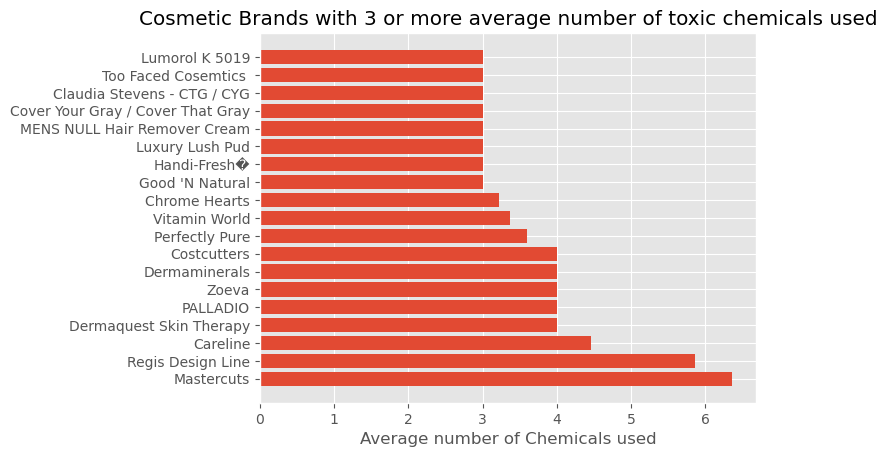

In [63]:
plt.barh(average_chemicals_per_brand['BrandName'],average_chemicals_per_brand['ChemicalCount'])
plt.xlabel("Average number of Chemicals used")
plt.title("Cosmetic Brands with 3 or more average number of toxic chemicals used")
plt.show()

In [64]:
#finding out the average chemicals used by a company in their products
average_chemicals_per_company = csc_data.groupby('CompanyName')['ChemicalCount'].mean().reset_index()
average_chemicals_per_company = average_chemicals_per_company[average_chemicals_per_company["ChemicalCount"]>=3]
average_chemicals_per_company = average_chemicals_per_company.sort_values(by='ChemicalCount', ascending=False)
average_chemicals_per_company

,CompanyName,ChemicalCount
451,Regis Corporation,4.803571
126,Cosmopharm Ltd.,4.461538
564,"Vitamin World, Inc.",3.303030
112,Chrome Hearts LLC,3.227273
206,Good 'N Natural,3.000000


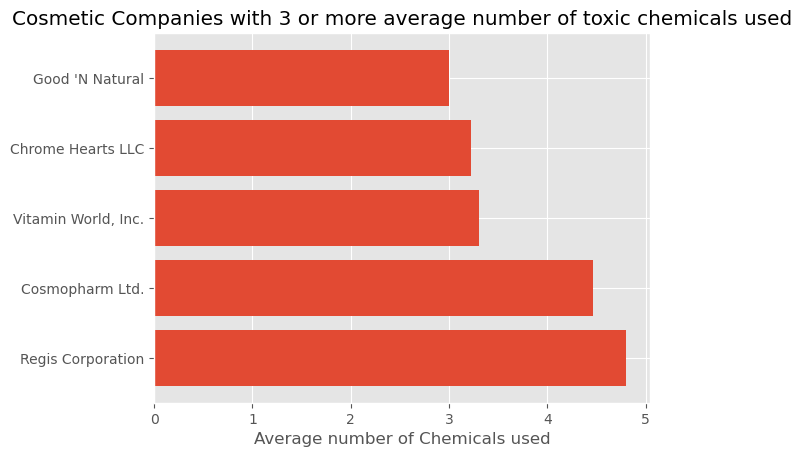

In [65]:
plt.barh(average_chemicals_per_company['CompanyName'],average_chemicals_per_company['ChemicalCount'])
plt.xlabel("Average number of Chemicals used")
plt.title("Cosmetic Companies with 3 or more average number of toxic chemicals used")
plt.show()

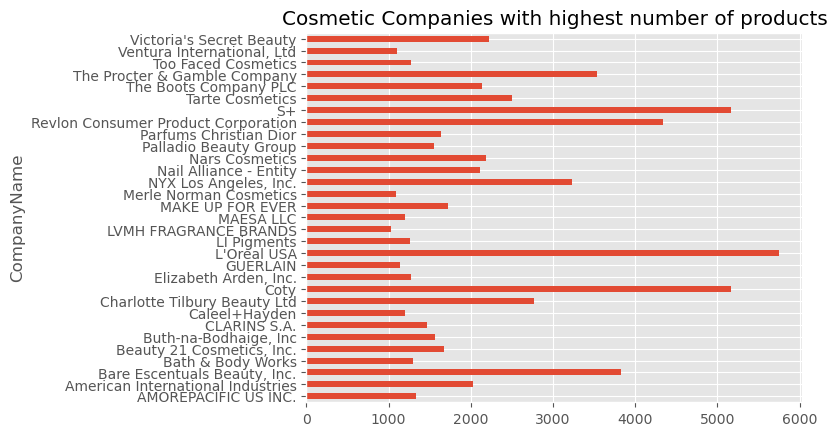

In [66]:
#finding out the maximum number of products developed by each company
csc_data['ProductCount'] = csc_data.groupby('CompanyName')['ProductName'].transform('count')
no_of_products_per_company = csc_data[csc_data["ProductCount"]>=1000]

no_of_products_per_company.groupby('CompanyName').size().plot(kind='barh')
plt.title("Cosmetic Companies with highest number of products")
plt.show()

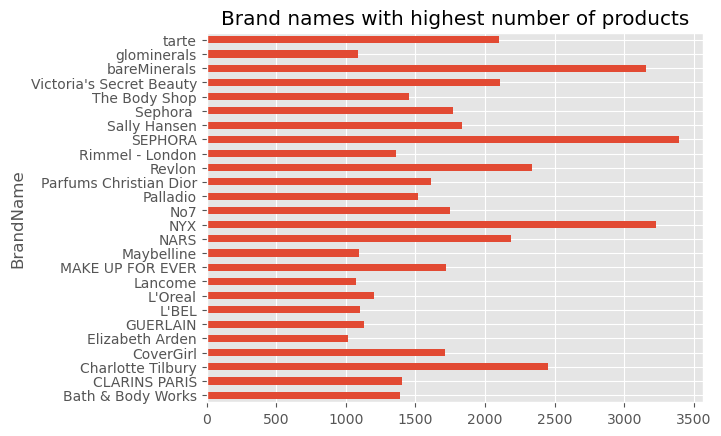

In [67]:
#finding out the maximum number of products developed under each brand
csc_data['ProductCount_Brand'] = csc_data.groupby('BrandName')['ProductName'].transform('count')
no_of_products_per_brand = csc_data[csc_data["ProductCount_Brand"]>=1000]

no_of_products_per_brand.groupby('BrandName').size().plot(kind='barh')
plt.title("Brand names with highest number of products")
plt.show()

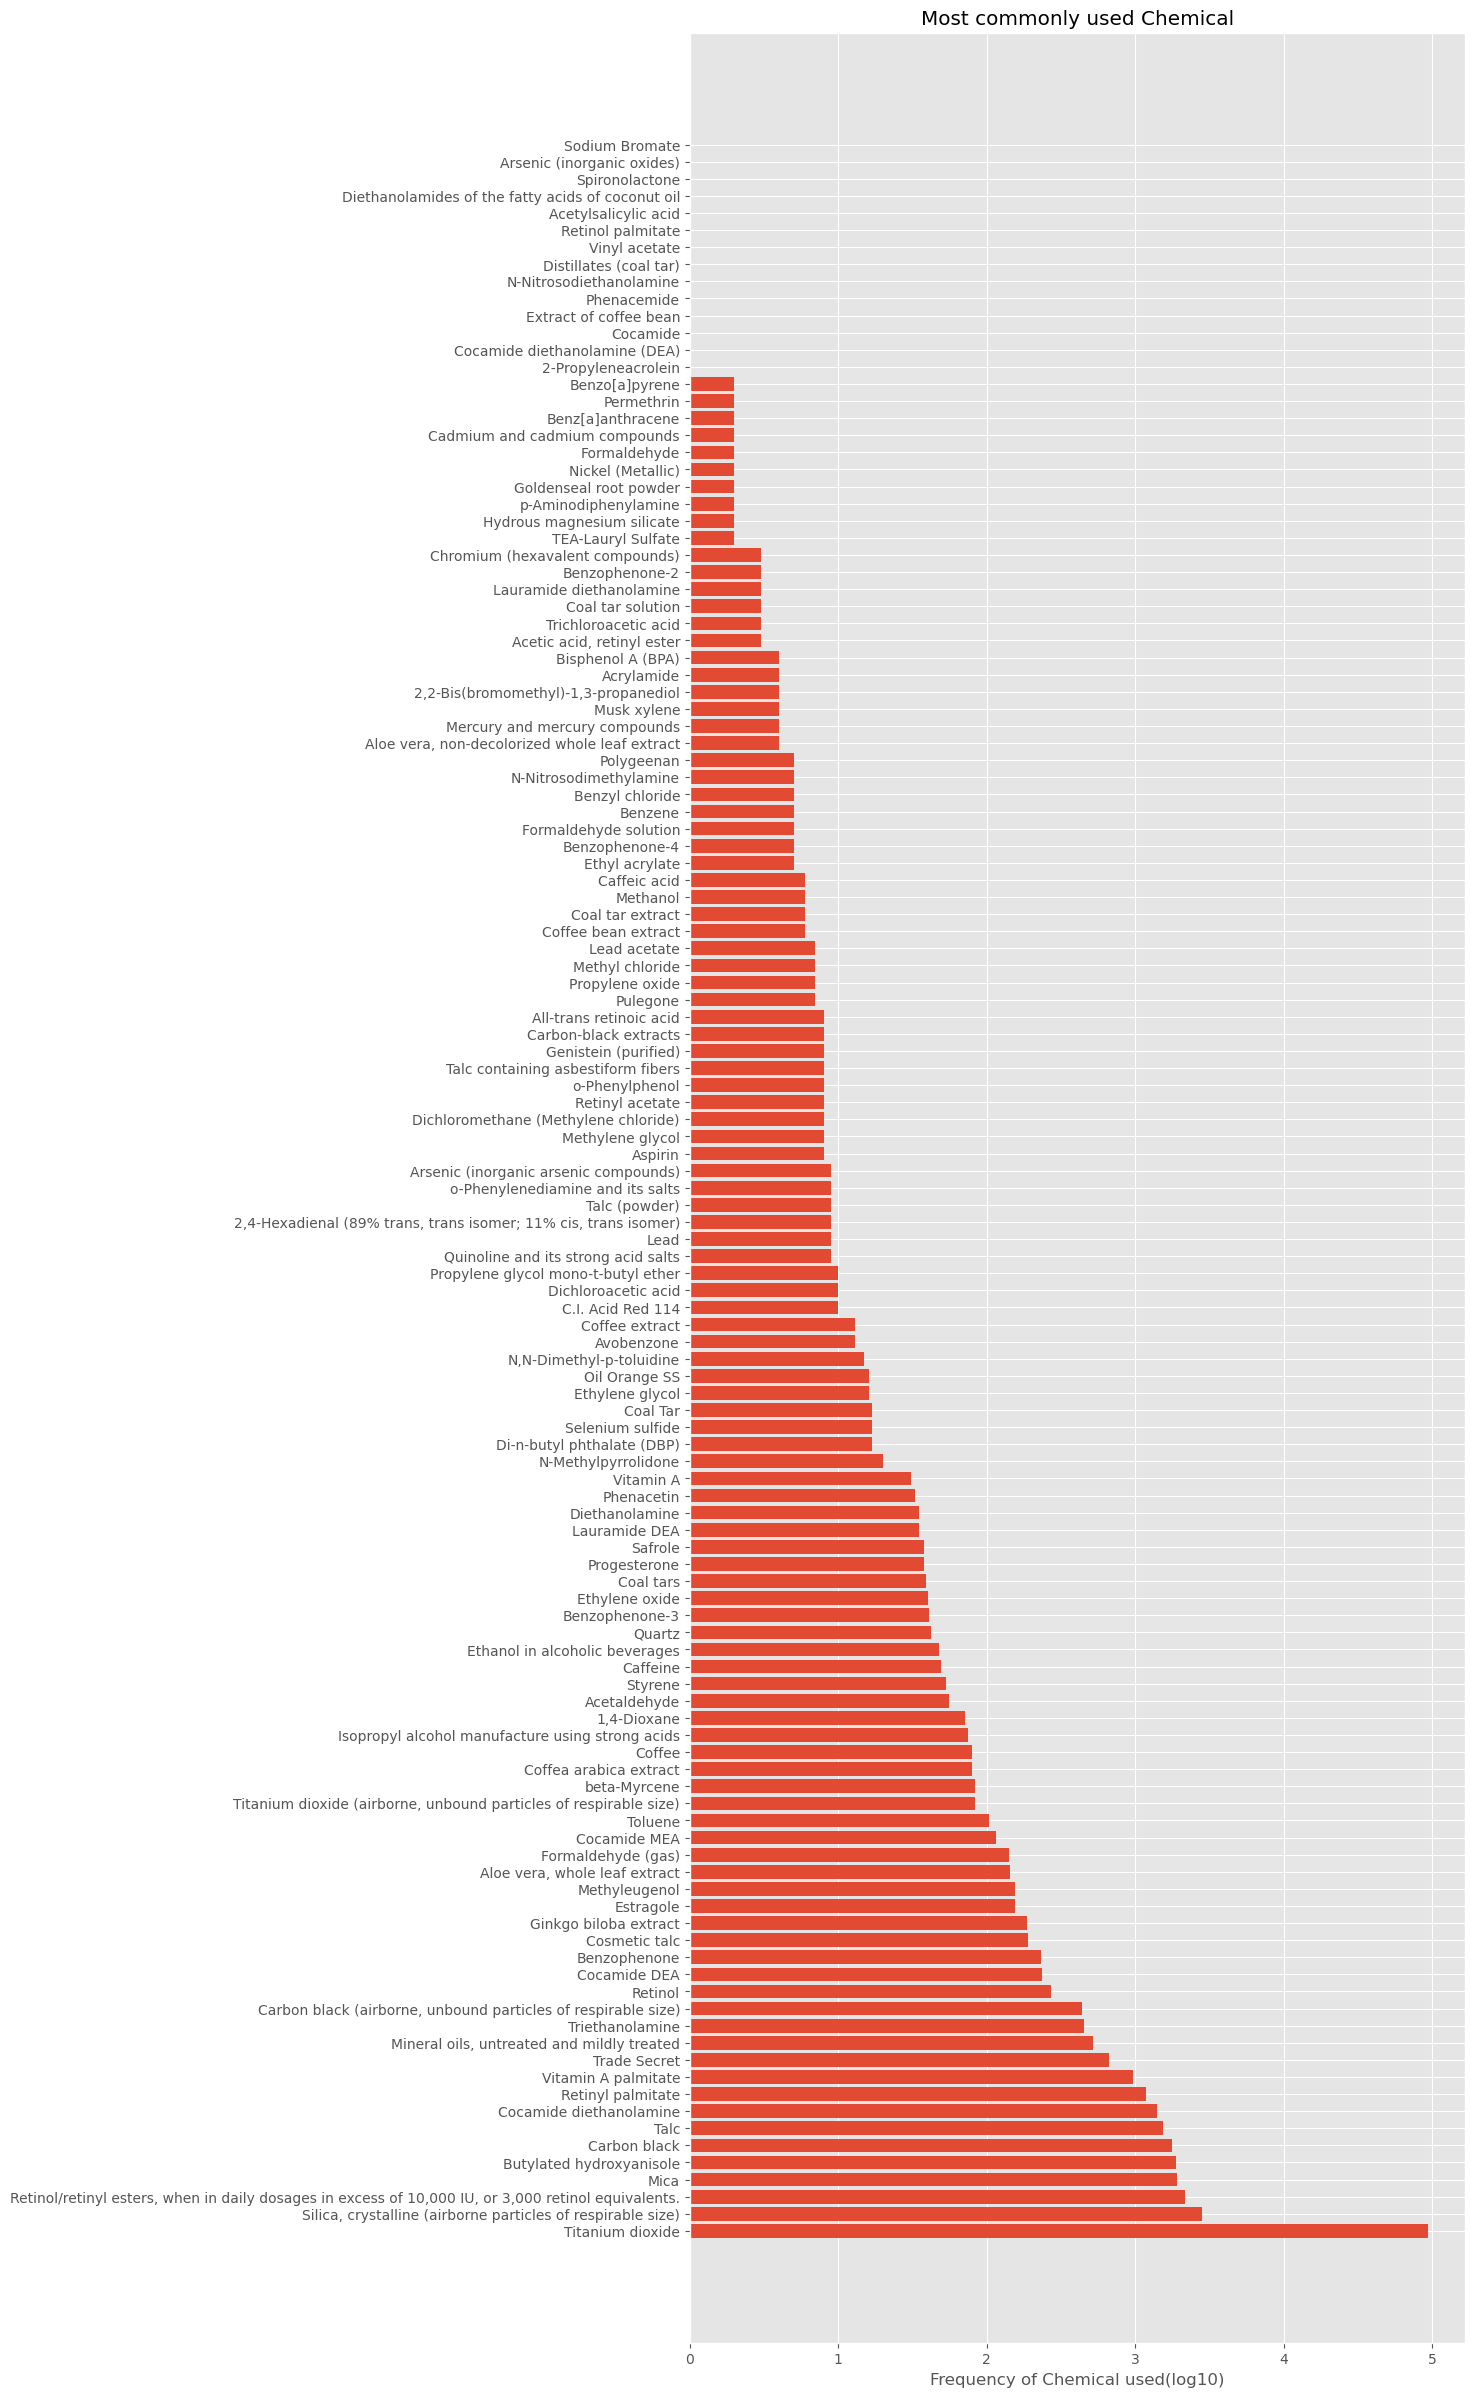

In [68]:
#finding out the most commonly used chemical in a product
csc_data['chemicals'] = csc_data.groupby('ChemicalName')['ChemicalName'].transform('count')
csc_data['logchemicals'] = [np.log10(i) for i in (csc_data['chemicals'])]
sorted_df = csc_data.sort_values(by='logchemicals', ascending=False)

plt.figure(figsize = (10,30))
plt.barh(sorted_df['ChemicalName'],sorted_df['logchemicals'])
plt.xlabel("Frequency of Chemical used(log10)")
plt.title("Most commonly used Chemical")
plt.show()

In [69]:
#finding out the product lifetime using the date columns present in the data
date_cols = ['InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 
             'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved']
for col in date_cols:
    csc_data[col] = pd.to_datetime(csc_data[col], errors='coerce')

csc_data['ProductLifetime'] = (csc_data['MostRecentDateReported'] - csc_data['InitialDateReported']).dt.days.fillna(0)
csc_data['ProductLifetime']

0         1533
1            0
2            0
3         1511
4         1511
          ... 
114630       0
114631       0
114632       0
114633       0
114634       0
Name: ProductLifetime, Length: 114635, dtype: int64

In [70]:
#finding out whether which product is discontinued by analysing with binary encoding
csc_data['ChemicalDiscontinued'] = csc_data['DiscontinuedDate'].notnull().astype(int)
csc_data['ChemicalDiscontinued']

0         1
1         0
2         0
3         0
4         1
         ..
114630    0
114631    0
114632    0
114633    0
114634    0
Name: ChemicalDiscontinued, Length: 114635, dtype: int32

In [71]:
#Data preprocessing for model creation
categorical_cols = ['PrimaryCategory', 'SubCategory', 'CompanyName', 'BrandName']
csc_data['Log_ChemicalCount'] = np.log1p(csc_data['ChemicalCount'])

numerical_cols = ['Log_ChemicalCount', 'ProductLifetime']

# Label encode categorical variables
encoder = LabelEncoder()
for col in categorical_cols:
    csc_data[col] = encoder.fit_transform(csc_data[col])

                   PrimaryCategory  SubCategory  CompanyName  BrandName  \
PrimaryCategory           1.000000     0.574977    -0.041826  -0.058299   
SubCategory               0.574977     1.000000    -0.059401  -0.100819   
CompanyName              -0.041826    -0.059401     1.000000   0.311099   
BrandName                -0.058299    -0.100819     0.311099   1.000000   
Log_ChemicalCount        -0.004730    -0.043575     0.056151  -0.000543   
ProductLifetime           0.001085    -0.044386    -0.100684   0.046831   

                   Log_ChemicalCount  ProductLifetime  
PrimaryCategory            -0.004730         0.001085  
SubCategory                -0.043575        -0.044386  
CompanyName                 0.056151        -0.100684  
BrandName                  -0.000543         0.046831  
Log_ChemicalCount           1.000000         0.004750  
ProductLifetime             0.004750         1.000000  


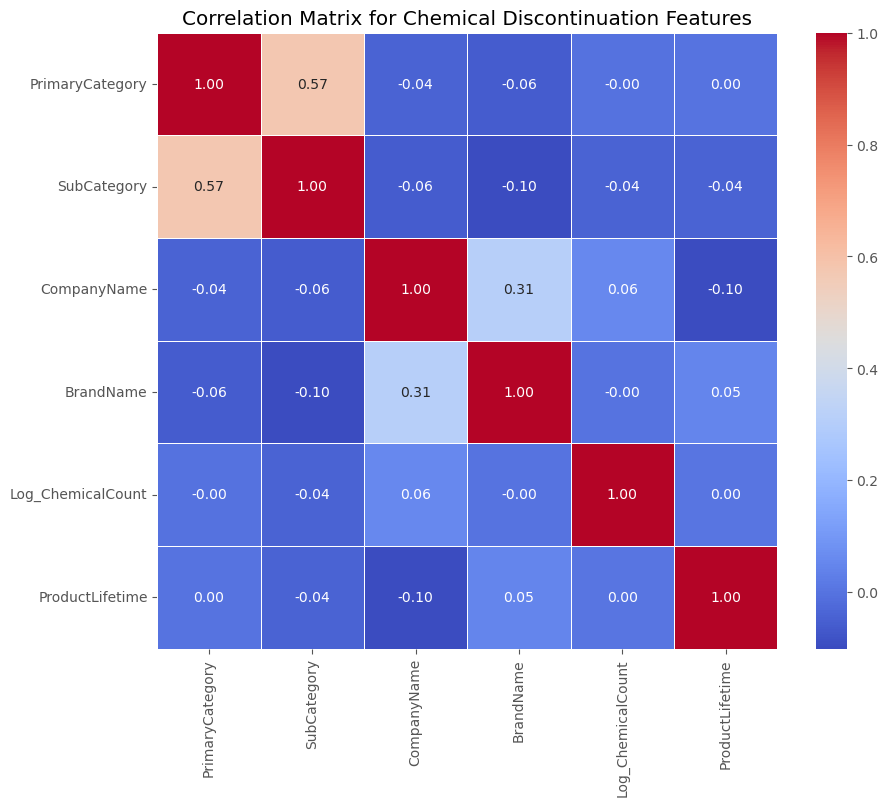

In [72]:
#Linearity,Multicollinearity:
# Combine both categorical and numerical columns for the correlation matrix
data_for_corr = csc_data[categorical_cols + numerical_cols]

# Compute the correlation matrix
corr_matrix = data_for_corr.corr()
print(corr_matrix)
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Chemical Discontinuation Features")
plt.show()


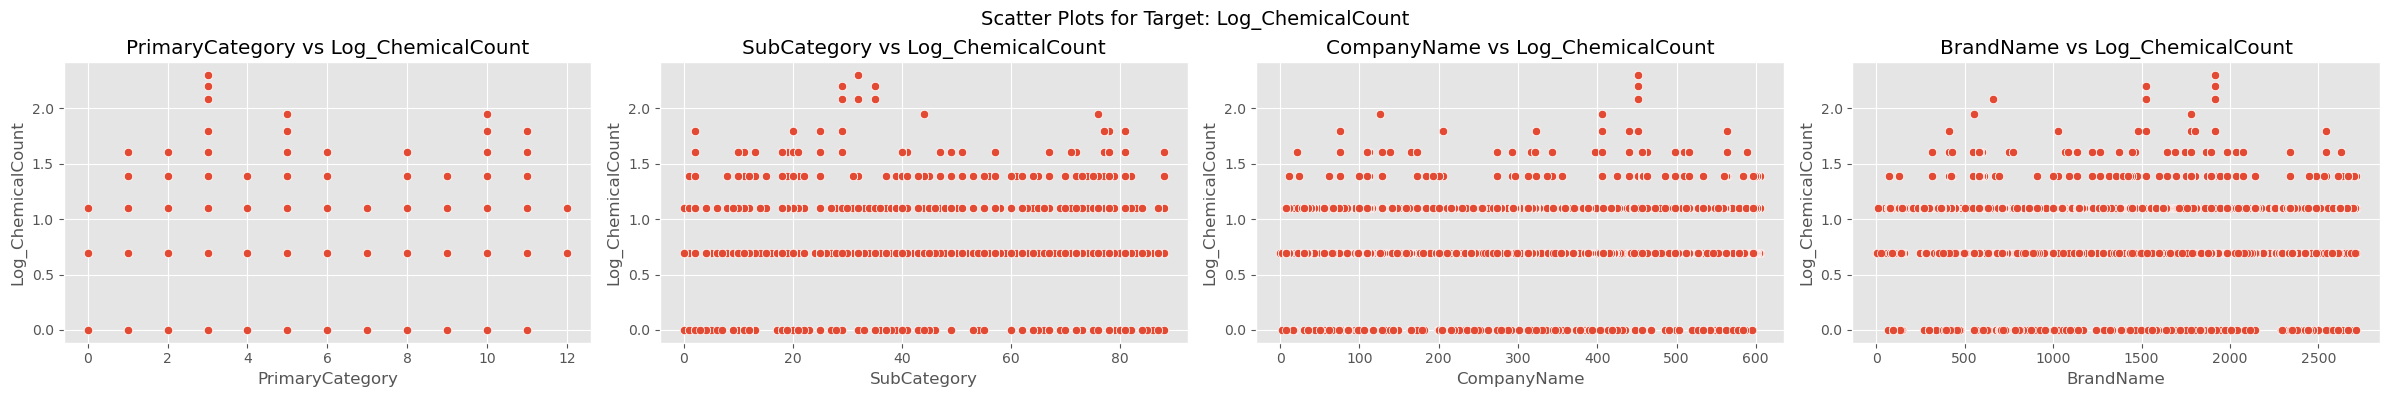

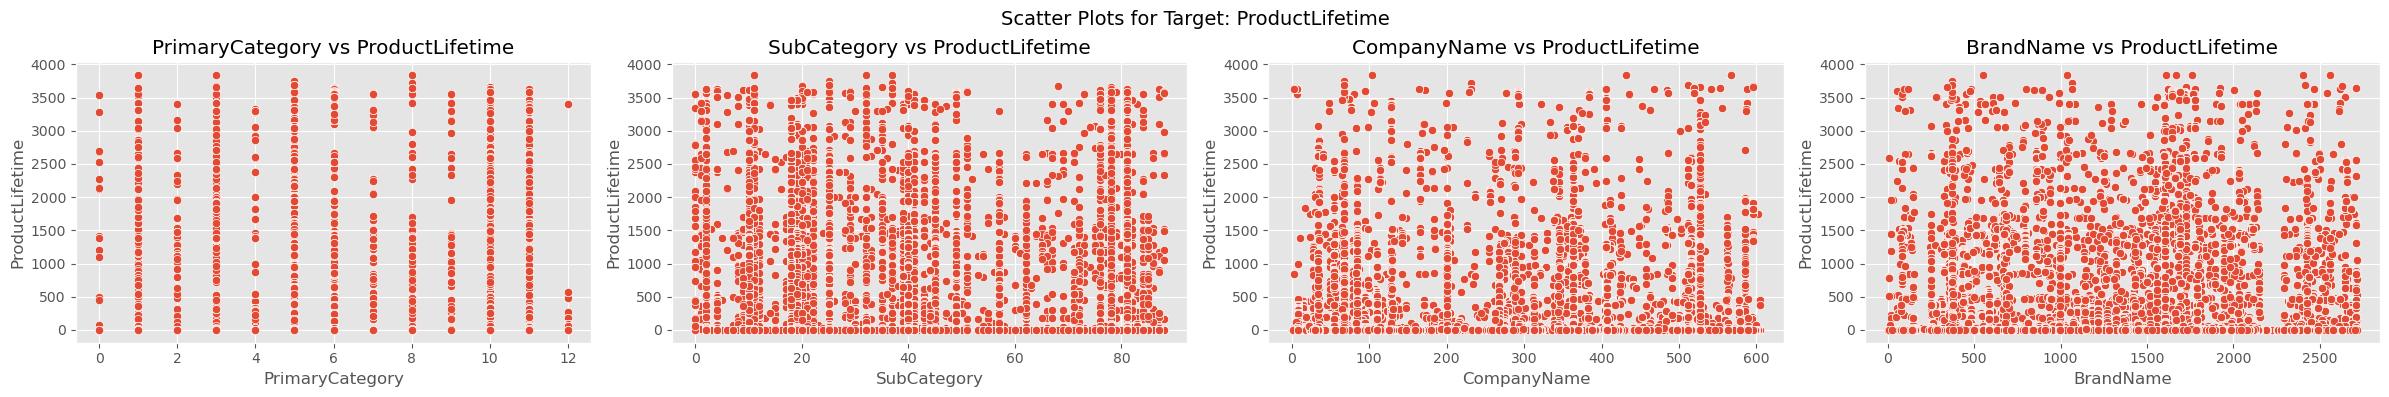

In [73]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Create a side-by-side scatter plot for each target vs categorical variable
for target in numerical_cols:
    num_plots = len(categorical_cols)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 4))
    fig.suptitle(f"Scatter Plots for Target: {target}", fontsize=14)

    for idx, col in enumerate(categorical_cols):
        sns.scatterplot(x=csc_data[col], y=csc_data[target], ax=axes[idx])
        axes[idx].set_title(f"{col} vs {target}")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(target)
        axes[idx].grid(True)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust space for the title
    plt.show()



--- Research Question 1: Predicting Chemical Discontinuation ---
Accuracy : 0.9848797650548109
Precision: 0.9495843389648699
Recall   : 0.9142783372063
F1 Score : 0.9315969481715338

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     30518
           1       0.95      0.91      0.93      3873

    accuracy                           0.98     34391
   macro avg       0.97      0.95      0.96     34391
weighted avg       0.98      0.98      0.98     34391



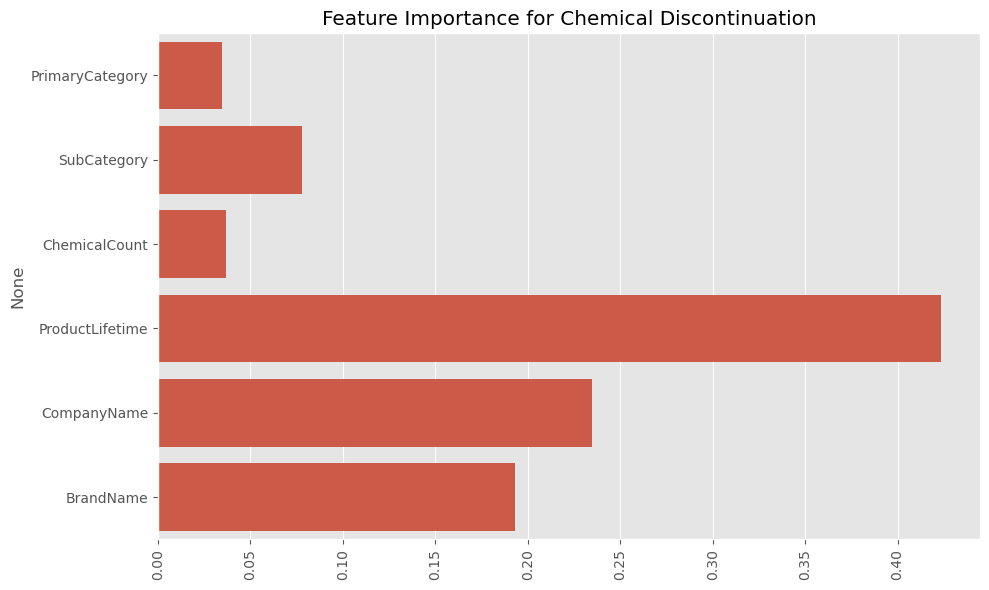

[0.03434452 0.07785721 0.0364967  0.42339709 0.2348273  0.19307718]


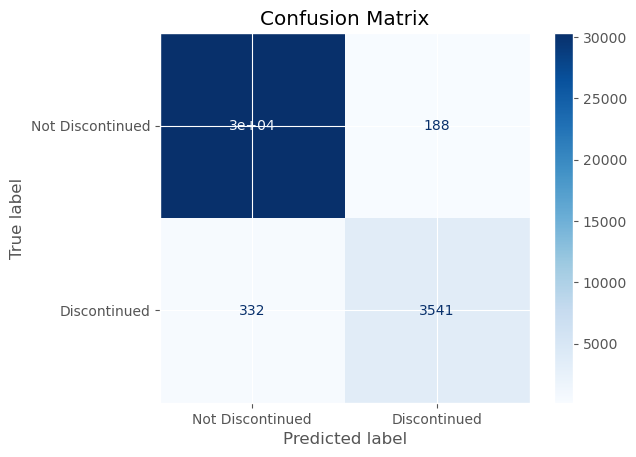

[[30330   188]
 [  332  3541]]


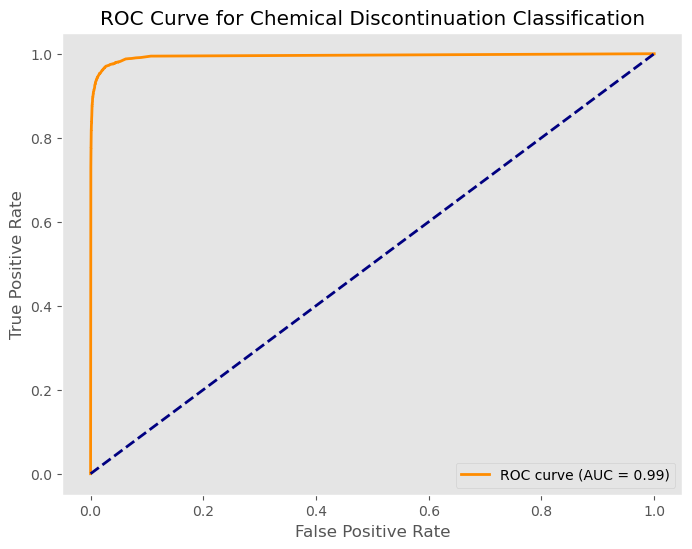

Cross-validation Accuracy: 0.884677454529594


In [74]:
#Random forest classifier model for research question 1

# Feature & target selection
X1 = csc_data[['PrimaryCategory', 'SubCategory', 'ChemicalCount', 'ProductLifetime', 'CompanyName', 'BrandName']]
X1 = pd.get_dummies(X1)  # Encode categorical features
y1 = csc_data['ChemicalDiscontinued']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Model training
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Predictions
y_pred = model1.predict(X_test)
y_proba = model1.predict_proba(X_test)[:, 1]

# --- Evaluation ---
print("\n--- Research Question 1: Predicting Chemical Discontinuation ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x=model1.feature_importances_, y=X1.columns)
plt.title('Feature Importance for Chemical Discontinuation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(model1.feature_importances_)
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Discontinued", "Discontinued"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
print(cm)
# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Chemical Discontinuation Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# --- Cross-Validation Accuracy ---
cv_scores = cross_val_score(model1, X1, y1, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", np.mean(cv_scores))



In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



Logistic Regression Results
[[29888   630]
 [ 3070   803]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     30518
           1       0.56      0.21      0.30      3873

    accuracy                           0.89     34391
   macro avg       0.73      0.59      0.62     34391
weighted avg       0.87      0.89      0.87     34391



In [76]:
from xgboost import XGBClassifier

# Model
xgb_model1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model1.fit(X_train, y_train)

# Predictions
y_pred_xgb1 = xgb_model1.predict(X_test)

# Evaluation
print("🔍 XGBoost Results")
print(confusion_matrix(y_test, y_pred_xgb1))
print(classification_report(y_test, y_pred_xgb1))


🔍 XGBoost Results
[[30307   211]
 [  479  3394]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30518
           1       0.94      0.88      0.91      3873

    accuracy                           0.98     34391
   macro avg       0.96      0.93      0.95     34391
weighted avg       0.98      0.98      0.98     34391



C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:48:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


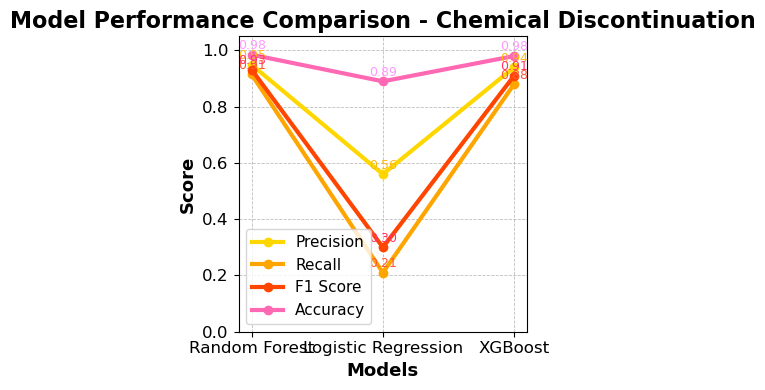

In [131]:

colors = {
    'Precision': '#FFD700',   # Gold/Yellow
    'Recall': '#FFA500',      # Orange
    'F1 Score': '#FF4500',    # Red-Orange
    'Accuracy': '#FF69B4' 
}

# Data
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
precision = [0.9488, 0.56, 0.94]
recall = [0.9145, 0.21, 0.88]
f1_score = [0.9314, 0.30, 0.91]
accuracy = [0.9848, 0.89, 0.98]

# Plot setup
plt.figure(figsize=(4, 4))
plt.style.use('default')  # Ensures clean white background

# Plot each metric line
plt.plot(models, precision, marker='o', label='Precision', color=colors['Precision'], linewidth=3)
plt.plot(models, recall, marker='o', label='Recall', color=colors['Recall'], linewidth=3)
plt.plot(models, f1_score, marker='o', label='F1 Score', color=colors['F1 Score'], linewidth=3)
plt.plot(models, accuracy, marker='o', label='Accuracy', color=colors['Accuracy'], linewidth=3)

for i in range(len(models)):
    plt.text(i, precision[i] + 0.02, f"{precision[i]:.2f}", ha='center', fontsize=9, color='#FDB813')
    plt.text(i, recall[i] + 0.02, f"{recall[i]:.2f}", ha='center', fontsize=9, color='#FF5733')
    plt.text(i, f1_score[i] + 0.02, f"{f1_score[i]:.2f}", ha='center', fontsize=9, color='#FF3366')
    plt.text(i, accuracy[i] + 0.02, f"{accuracy[i]:.2f}", ha='center', fontsize=9, color='#FF99FF')

# Formatting
plt.title('Model Performance Comparison - Chemical Discontinuation', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=13, fontweight='semibold')
plt.ylabel('Score', fontsize=13, fontweight='semibold')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.5, color='gray')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11, loc='lower left')
plt.tight_layout()

# Save
plt.savefig("chemical_discontinuation_ppt_background_style.png", dpi=300)
plt.show()



--- Research Question 2: Predicting Chemical Redevelopment ---
Accuracy : 0.951876944549446
Precision: 0.7782312925170068
Recall   : 0.5954198473282443
F1 Score : 0.6746609003341851

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     31509
           1       0.78      0.60      0.67      2882

    accuracy                           0.95     34391
   macro avg       0.87      0.79      0.82     34391
weighted avg       0.95      0.95      0.95     34391



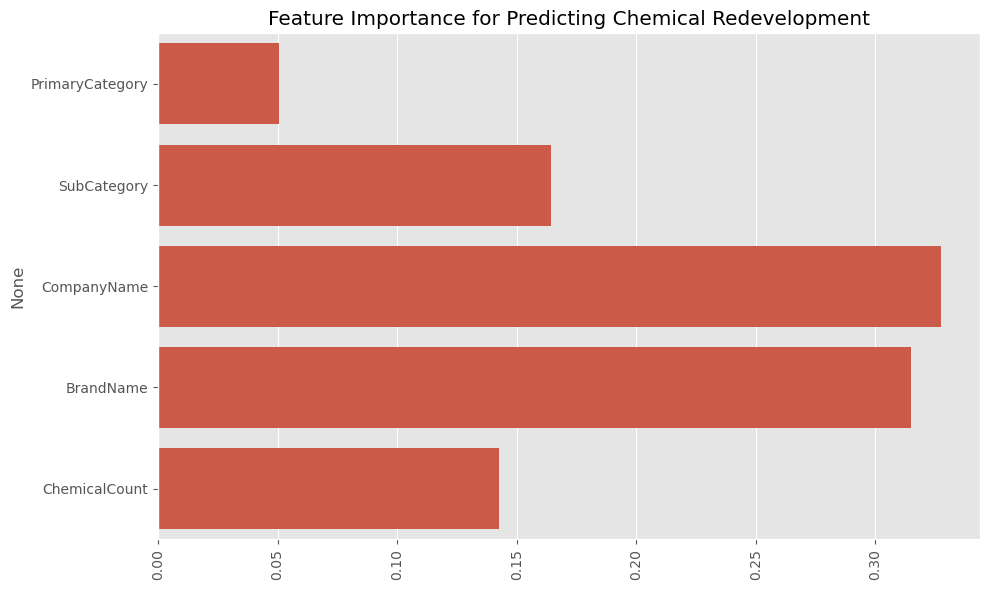

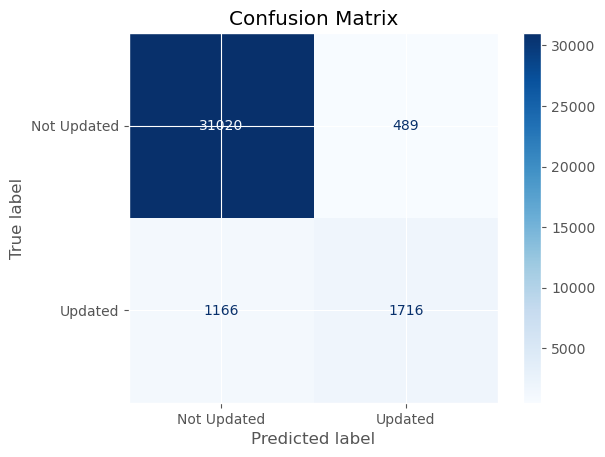

[[31020   489]
 [ 1166  1716]]


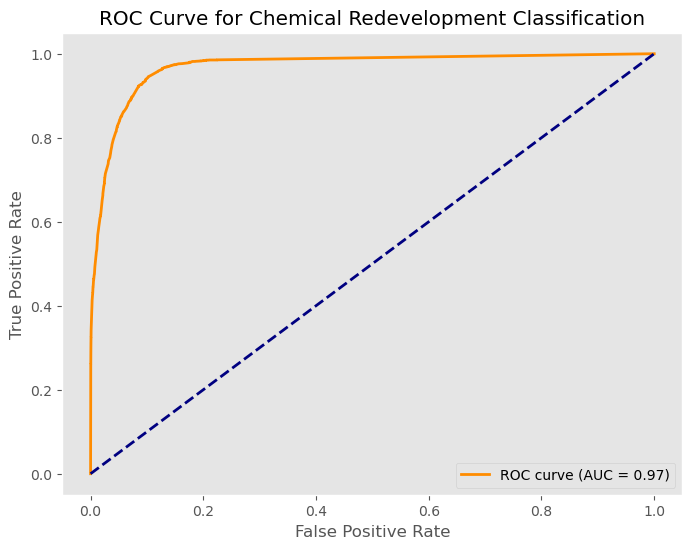

Cross-validation Accuracy: 0.8974222532385397


In [77]:
#Random forest classifier model for research question 2
csc_data['ChemicalUpdatedFlag'] = (csc_data['ChemicalCreatedAt'] != csc_data['ChemicalUpdatedAt']).astype(int)

# Feature selection and encoding
X3 = csc_data[['PrimaryCategory', 'SubCategory', 'CompanyName', 'BrandName', 'ChemicalCount']]
X3 = pd.get_dummies(X3)  # Encode categorical variables
y3 = csc_data['ChemicalUpdatedFlag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Model training
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

# Predictions
y_pred = model3.predict(X_test)
y_proba = model3.predict_proba(X_test)[:, 1]

# --- Evaluation ---
print("\n--- Research Question 2: Predicting Chemical Redevelopment ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x=model3.feature_importances_, y=X3.columns)
plt.title('Feature Importance for Predicting Chemical Redevelopment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Updated", "Updated"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
print(cm)
# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Chemical Redevelopment Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# --- Cross-validation Accuracy ---
cv_scores = cross_val_score(model3, X3, y3, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", np.mean(cv_scores))

C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:57:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 XGBoost Results
[[31184   325]
 [ 1372  1510]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     31509
           1       0.82      0.52      0.64      2882

    accuracy                           0.95     34391
   macro avg       0.89      0.76      0.81     34391
weighted avg       0.95      0.95      0.95     34391



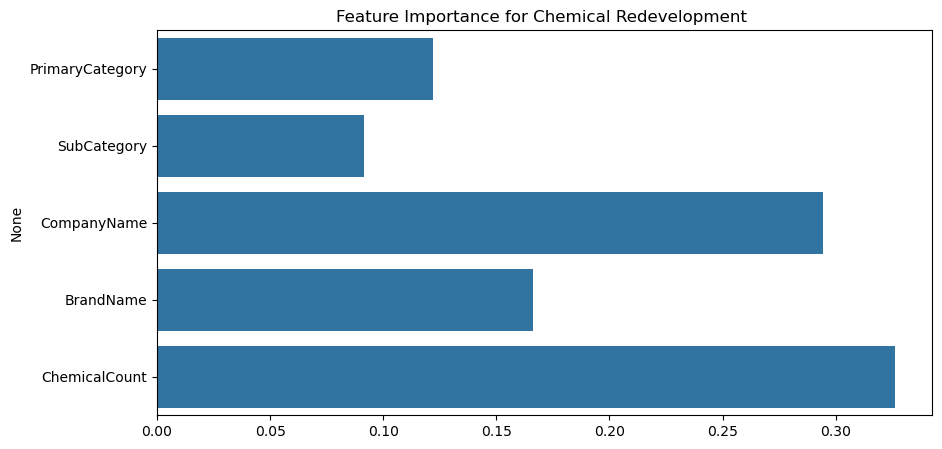


--- Research Question 2: Predicting Chemical Redevelopment ---
Accuracy : 0.9506556948038731
Precision: 0.8228882833787466
Recall   : 0.5239417071478141

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     31509
           1       0.82      0.52      0.64      2882

    accuracy                           0.95     34391
   macro avg       0.89      0.76      0.81     34391
weighted avg       0.95      0.95      0.95     34391



In [99]:
# Encode categorical features
label_cols = ['PrimaryCategory', 'SubCategory', 'CompanyName']
for col in label_cols:
    csc_data[col] = LabelEncoder().fit_transform(csc_data[col].astype(str))


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred = xgb_model.predict(X_test)
print("🔍 XGBoost Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Feature Importance Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_model.feature_importances_, y=X3.columns)
plt.title('Feature Importance for Chemical Redevelopment ')
plt.show()

print("\n--- Research Question 2: Predicting Chemical Redevelopment ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
#print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

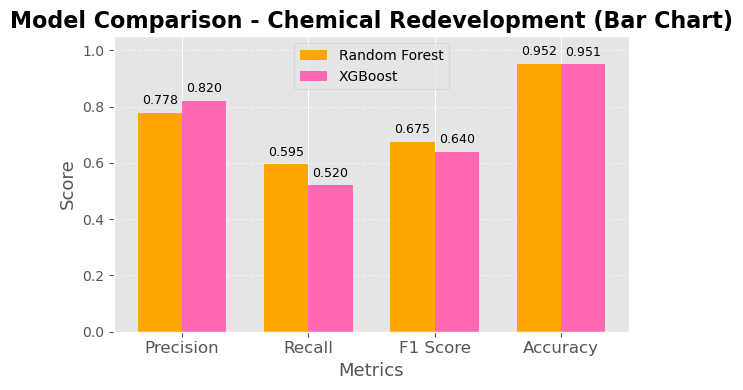

In [130]:
models = ['Random Forest', 'XGBoost']
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

# Performance values for each model
values_rf = [0.7782, 0.5954, 0.6747, 0.9519]
values_xgb = [0.82, 0.52, 0.64, 0.9508]

# Bar positions
x = np.arange(len(metrics))
bar_width = 0.35

# Colors
color_rf = '#FFA500'   # Orange
color_xgb = '#FF69B4'  # Pink

# Create the plot
plt.figure(figsize=(6, 4))
bar_1 = plt.bar(x - bar_width/2, values_rf, bar_width, label='Random Forest', color=color_rf)
bar_2 = plt.bar(x + bar_width/2, values_xgb, bar_width, label='XGBoost', color=color_xgb)

for bars in [bar_1, bar_2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Add titles and labels
plt.title('Model Comparison - Chemical Redevelopment (Bar Chart)', fontsize=16, fontweight='bold')
plt.xlabel('Metrics', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.xticks(ticks=x, labels=metrics, fontsize=12)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the chart
plt.show()



--- Research Question 4: Predicting Number of Chemicals in a Product ---
Test RMSE: 0.3768755506130294


C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


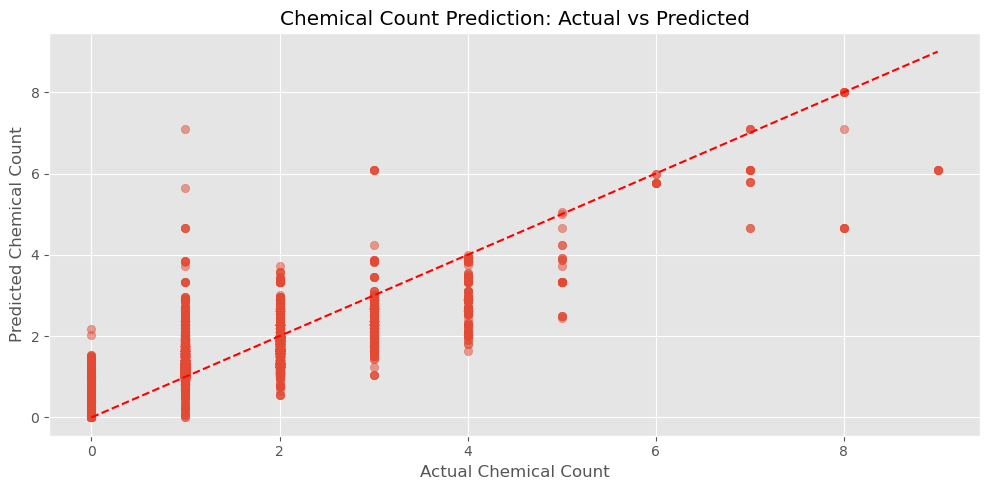

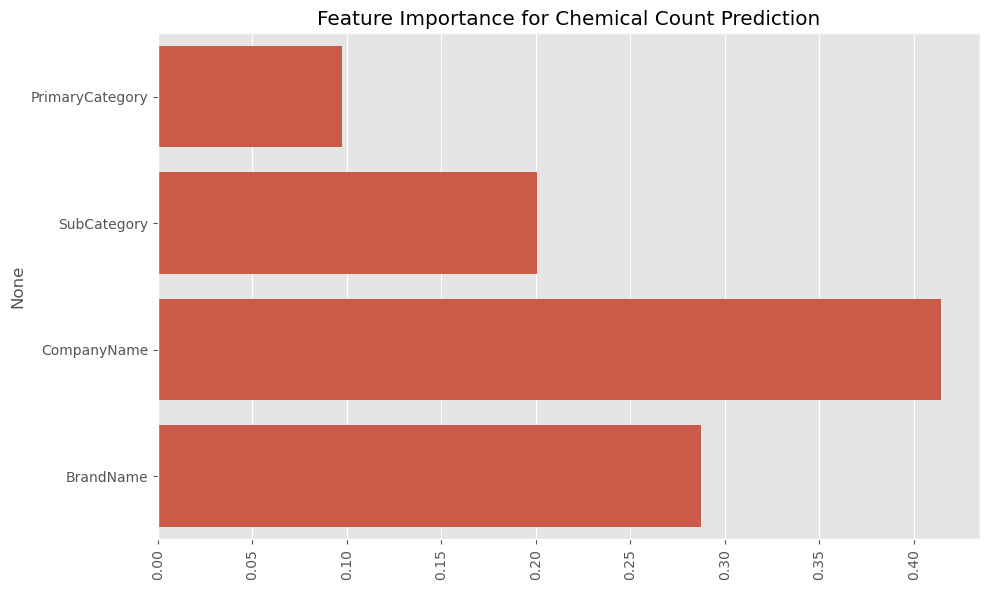

[0.09735776 0.20073561 0.41439297 0.28751366]


C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 0.36322469823643244
Test RMSE : 0.3768755506130294
Cross-validation RMSE: 0.5951523231480872


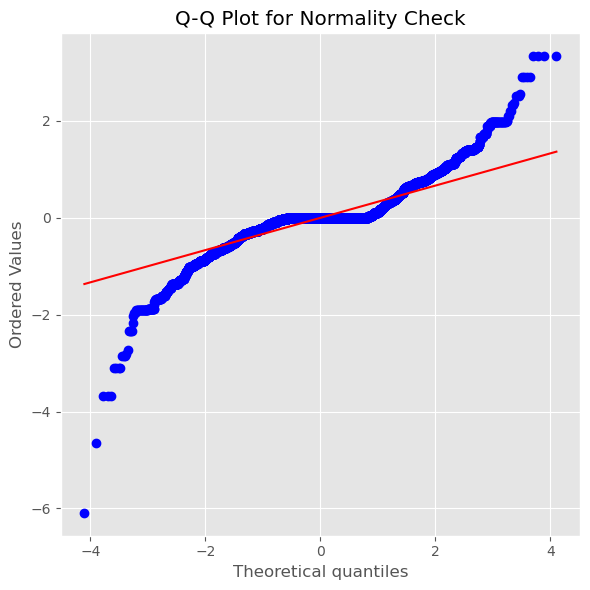

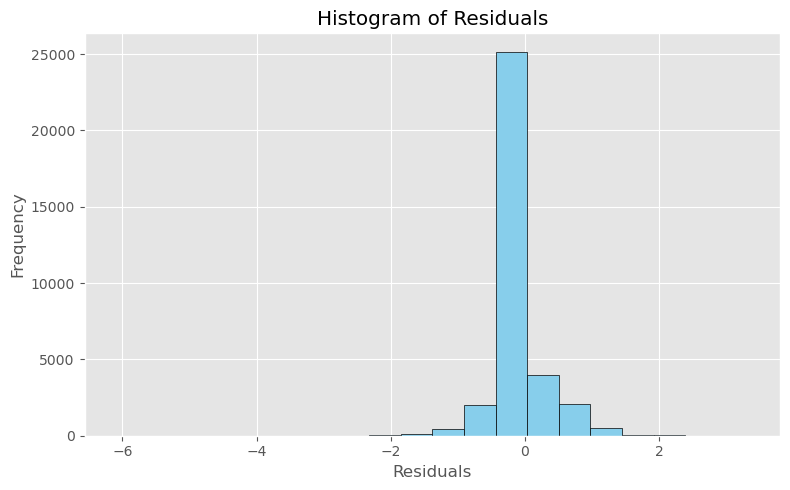

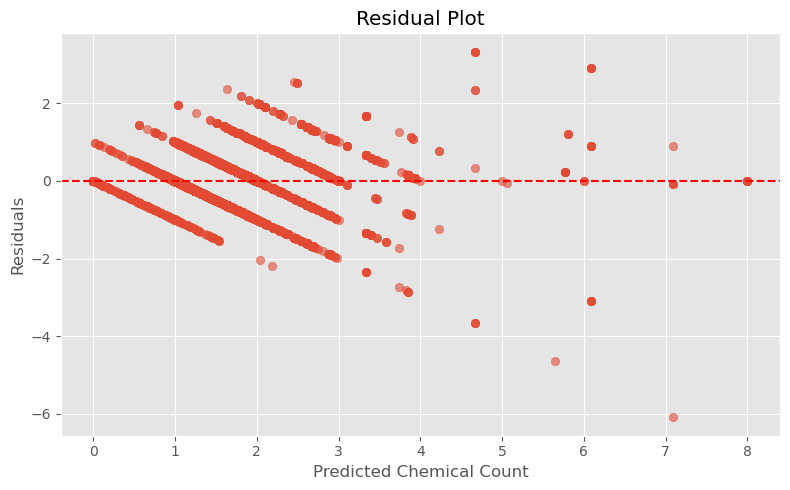

MAE: 0.26412643375321093
R²: 0.6472176769256484


In [116]:
#Random forest regressor model for research question 3

# Feature and target selection
X4 = csc_data[['PrimaryCategory', 'SubCategory', 'CompanyName', 'BrandName']]
X4 = pd.get_dummies(X4)  # Encode categorical features
y4 = csc_data['ChemicalCount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

# Model training
model4 = RandomForestRegressor(n_estimators=100, random_state=42)
model4.fit(X_train, y_train)

# Predictions
y_pred = model4.predict(X_test)

print("\n--- Research Question 4: Predicting Number of Chemicals in a Product ---")
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Actual vs Predicted plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Chemical Count')
plt.ylabel('Predicted Chemical Count')
plt.title('Chemical Count Prediction: Actual vs Predicted')
plt.tight_layout()
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model4.feature_importances_, y=X4.columns)
plt.title('Feature Importance for Chemical Count Prediction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(model4.feature_importances_)
# RMSE for Train and Test
train_preds = model4.predict(X_train)
test_preds = model4.predict(X_test)

print("Train RMSE:", mean_squared_error(y_train, train_preds, squared=False))
print("Test RMSE :", mean_squared_error(y_test, test_preds, squared=False))

# Cross-validation RMSE
cv_scores = cross_val_score(model4, X4, y4, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validation RMSE:", -np.mean(cv_scores))

# Residuals analysis
residuals_1 = y_test - y_pred

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals_1, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')
plt.tight_layout()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals_1, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals_1, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Chemical Count')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred_xgb)

print("MAE:", mae)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

In [117]:
model_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_lgb.fit(X_train, y_train)

train_preds = model_lgb.predict(X_train)
y_pred_lgb = model_lgb.predict(X_test)

print("LightGBM Test RMSE:", mean_squared_error(y_test, y_pred_lgb, squared=False))
print("Train RMSE:", mean_squared_error(y_train, train_preds, squared=False))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_lgb)

print("MAE:", mae)

print("R²:", r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 80244, number of used features: 4
[LightGBM] [Info] Start training from score 1.288682
LightGBM Test RMSE: 0.4194972618366137
Train RMSE: 0.4174343552968596
MAE: 0.2590633484669749
R²: 0.6472176769256484


C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [118]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
train_preds = model_xgb.predict(X_train)
print("XGBoost Test RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("Train RMSE:", mean_squared_error(y_train, train_preds, squared=False))
mae = mean_absolute_error(y_test, y_pred_xgb)

print("MAE:", mae)


r2 = r2_score(y_test, y_pred)
print("R²:", r2)

XGBoost Test RMSE: 0.423200214489869
Train RMSE: 0.41953082823006377
MAE: 0.26325329437928596
R²: 0.6472176769256484


C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [82]:
##from sklearn.model_selection import RandomizedSearchCV
 
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,               # More = better, but slower
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

print("Best Parameters:", random_search.best_params_)
 

IndentationError: unexpected indent (418605313.py, line 2)

In [119]:
final_rf_model = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=42
)

final_rf_model.fit(X_train, y_train)
final_preds = final_rf_model.predict(X_test)

print("Final Tuned Test RMSE:", mean_squared_error(y_test, final_preds, squared=False))

mae = mean_absolute_error(y_test, final_preds)

print("MAE:", mae)

r2 = r2_score(y_test, y_pred)
print("R²:", r2)

Final Tuned Test RMSE: 0.37558862619694666
MAE: 0.19091581398330673
R²: 0.6472176769256484


C:\Users\ar1963\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


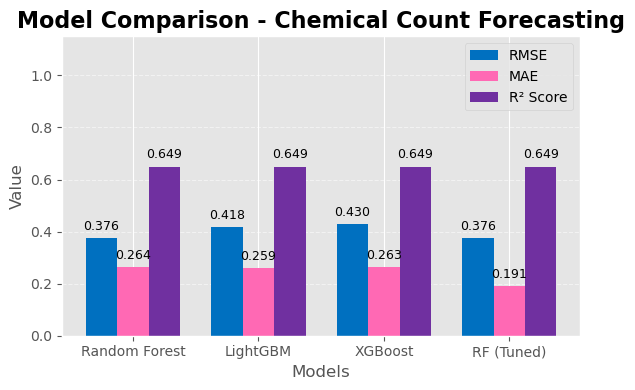

In [129]:

models = ['Random Forest', 'LightGBM', 'XGBoost', 'RF (Tuned)']
rmse_values = [0.3757, 0.4182, 0.4298, 0.3757]
mae_values = [0.2641, 0.2590, 0.2632, 0.1909]
r2_values = [0.6495] * 4

x = np.arange(len(models))
bar_width = 0.25

# Colors
color_rmse = '#0070C0'  # Blue
color_mae = '#FF69B4'   # Pink
color_r2 = '#7030A0'    # Purple

# Create figure
plt.figure(figsize=(6, 4))

# Plot bars
bars_rmse = plt.bar(x - bar_width, rmse_values, width=bar_width, label='RMSE', color=color_rmse)
bars_mae = plt.bar(x, mae_values, width=bar_width, label='MAE', color=color_mae)
bars_r2 = plt.bar(x + bar_width, r2_values, width=bar_width, label='R² Score', color=color_r2)

# Add value labels
for bars in [bars_rmse, bars_mae, bars_r2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Styling
plt.title('Model Comparison - Chemical Count Forecasting', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(x, models)
plt.ylim(0, 1.15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

